# EDA

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline
from pandas import DataFrame
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", None)

import utils as utils

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


## Importing the dataset

In [4]:
games, season_games, teams, seasons, rankings, games_matchup = utils.load_df()

In [5]:
len(season_games.SEASON.unique())

16

In [6]:
print(games_matchup.shape)
games_matchup.info()

(19398, 70)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19398 entries, 20300001 to 21801230
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GAME_DATE_EST          19398 non-null  datetime64[ns]
 1   HOME_TEAM_NAME         19398 non-null  object        
 2   HOME_TEAM_ID           19398 non-null  int64         
 3   VISITOR_TEAM_NAME      19398 non-null  object        
 4   VISITOR_TEAM_ID        19398 non-null  int64         
 5   GAME_STATUS_TEXT       19398 non-null  object        
 6   SEASON                 19398 non-null  int64         
 7   HT_RANK                19398 non-null  int64         
 8   HT_CLASS               19398 non-null  int64         
 9   HT_HW                  19398 non-null  int64         
 10  HT_HL                  19398 non-null  int64         
 11  HT_VW                  19398 non-null  int64         
 12  HT_VL                  19398 non-null 

## Checking null value

In [7]:
games_matchup.isnull().any()

GAME_DATE_EST            False
HOME_TEAM_NAME           False
HOME_TEAM_ID             False
VISITOR_TEAM_NAME        False
VISITOR_TEAM_ID          False
GAME_STATUS_TEXT         False
SEASON                   False
HT_RANK                  False
HT_CLASS                 False
HT_HW                    False
HT_HL                    False
HT_VW                    False
HT_VL                    False
HT_LAST10_W              False
HT_LAST10_L              False
HT_LAST10_MATCHUP_W      False
HT_LAST10_MATCHUP_L      False
HT_OVERALL_OFF_POINTS    False
HT_OVERALL_DEF_POINTS    False
HT_OVERALL_OFF_FG        False
HT_OVERALL_DEF_FG        False
HT_OVERALL_OFF_3P        False
HT_OVERALL_DEF_3P        False
HT_OVERALL_OFF_FT        False
HT_OVERALL_DEF_FT        False
HT_OVERALL_OFF_REB       False
HT_OVERALL_DEF_REB       False
HT_AWAY_POINTS           False
HT_AWAY_FG               False
HT_AWAY_3P               False
HT_AWAY_FT               False
HT_AWAY_REB              False
VT_RANK 

## Unique enteries in each of the columns

In [8]:
games_matchup.nunique()

GAME_DATE_EST            2575
HOME_TEAM_NAME           30  
HOME_TEAM_ID             30  
VISITOR_TEAM_NAME        30  
VISITOR_TEAM_ID          30  
GAME_STATUS_TEXT         1   
SEASON                   16  
HT_RANK                  30  
HT_CLASS                 3   
HT_HW                    527 
HT_HL                    346 
HT_VW                    365 
HT_VL                    445 
HT_LAST10_W              11  
HT_LAST10_L              11  
HT_LAST10_MATCHUP_W      11  
HT_LAST10_MATCHUP_L      11  
HT_OVERALL_OFF_POINTS    9652
HT_OVERALL_DEF_POINTS    9841
HT_OVERALL_OFF_FG        130 
HT_OVERALL_DEF_FG        126 
HT_OVERALL_OFF_3P        173 
HT_OVERALL_DEF_3P        176 
HT_OVERALL_OFF_FT        192 
HT_OVERALL_DEF_FT        133 
HT_OVERALL_OFF_REB       4519
HT_OVERALL_DEF_REB       5252
HT_AWAY_POINTS           6368
HT_AWAY_FG               111 
HT_AWAY_3P               167 
HT_AWAY_FT               182 
HT_AWAY_REB              3635
VT_RANK                  30  
VT_CLASS  

## Visualizing the data

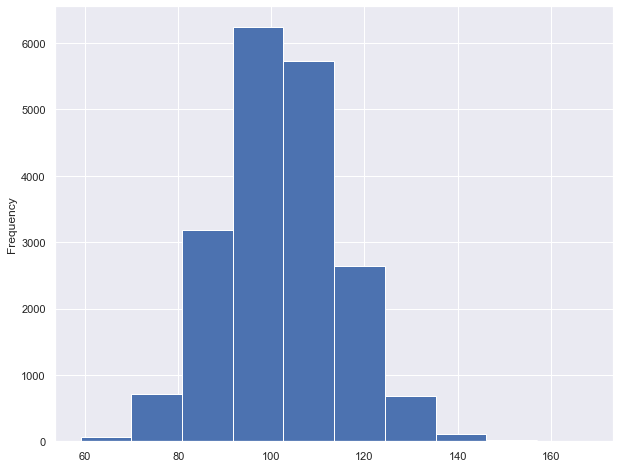

In [9]:
games_matchup["PTS_home"].plot.hist(bins=10, figsize=(10,8))

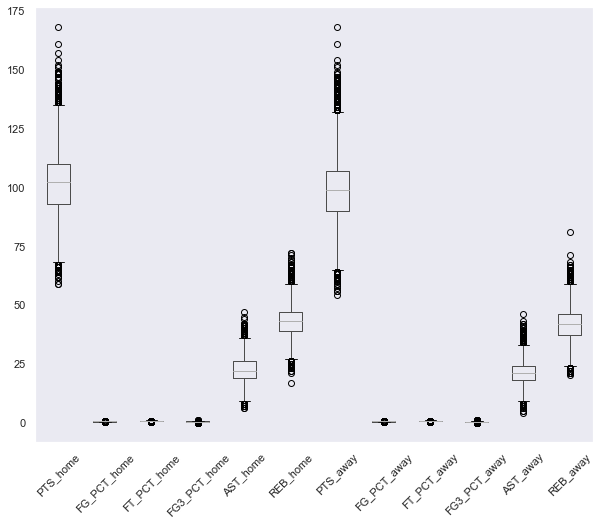

In [10]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=[    "PTS_home",
"FG_PCT_home",
"FT_PCT_home",
"FG3_PCT_home",
"AST_home",
"REB_home",
"PTS_away",
"FG_PCT_away",
"FT_PCT_away",
"FG3_PCT_away",
"AST_away",
"REB_away"])

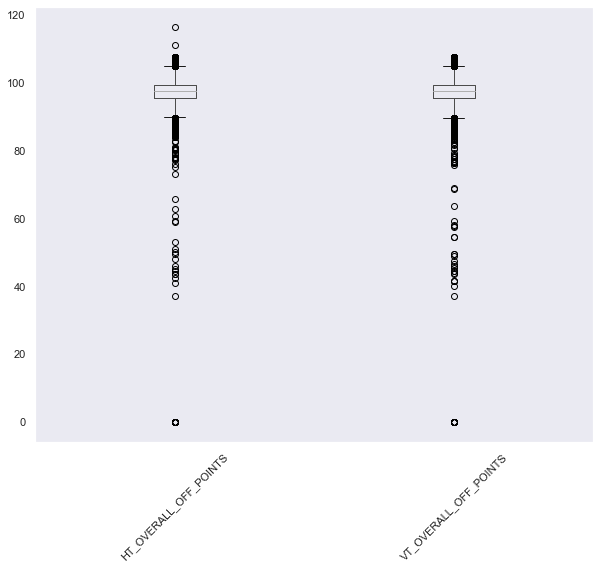

In [11]:
boxplot = games_matchup.boxplot(grid=False, rot=45, figsize=(10, 8), column=["HT_OVERALL_OFF_POINTS",
"VT_OVERALL_OFF_POINTS"])

In [12]:
len(games_matchup.loc[games_matchup["HT_OVERALL_OFF_POINTS"] > 108])

2

In [13]:
#sns.pairplot(games_matchup)

In [14]:
games_matchup[["GAME_DATE_EST", "SEASON", "HOME_TEAM_ID", "VISITOR_TEAM_ID"]].groupby(["SEASON", "HOME_TEAM_ID"]).count()

GAME_DATE_EST  VISITOR_TEAM_ID
SEASON HOME_TEAM_ID                                
2003   1610612737    41             41             
       1610612738    41             41             
       1610612739    41             41             
       1610612740    41             41             
       1610612741    41             41             
       1610612742    41             41             
       1610612743    41             41             
       1610612744    41             41             
       1610612745    41             41             
       1610612746    41             41             
       1610612747    41             41             
       1610612748    41             41             
       1610612749    41             41             
       1610612750    41             41             
       1610612751    41             41             
       1610612752    41             41             
       1610612753    41             41             
       1610612754    41             41             
       1610612755    41             41             
       1610612756    41             41             
       1610612757    41             41             
       1610612758    41             41             
       1610612759    41             41             
       1610612760    41             41             
       1610612761    41             41             
       1610612762    41             41             
       1610612763    41             41             
       1610612764    41             41             
       1610612765    41             41             
2004   1610612737    41             41             
       1610612738    41             41             
       1610612739    41             41             
       1610612740    41             41             
       1610612741    41             41             
       1610612742    41             41             
       1610612743    41             41             
       1610612744    41             41             
       1610612745    41             41             
       1610612746    41             41             
       1610612747    41             41             
       1610612748    41             41             
       1610612749    41             41             
       1610612750    41             41             
       1610612751    41             41             
       1610612752    41             41             
       1610612753    41             41             
       1610612754    41             41             
       1610612755    41             41             
       1610612756    41             41             
       1610612757    41             41             
       1610612758    41             41             
       1610612759    41             41             
       1610612760    41             41             
       1610612761    41             41             
       1610612762    41             41             
       1610612763    41             41             
       1610612764    41             41             
       1610612765    41             41             
       1610612766    41             41             
2005   1610612737    41             41             
       1610612738    41             41             
       1610612739    41             41             
       1610612740    41             41             
       1610612741    41             41             
       1610612742    41             41             
       1610612743    41             41             
       1610612744    41             41             
       1610612745    41             41             
       1610612746    41             41             
       1610612747    41             41             
       1610612748    41             41             
       1610612749    41             41             
       1610612750    41             41             
       1610612751    41             41             
       1610612752    41             41             
       1610612753

In [ ]:
len(games)

In [17]:
teams[teams.TEAM_ID == 1610612738]

,TEAM_ID,NAME,NICKNAME,CITY
1,1610612738,BOS,Celtics,Boston
